# Simple Linear Regression. Minimal Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs

## Random input data to train on

**np.random.uniform(low, high, size)** - draws a random value from the interval (low,high), where each number has an equal chance to be selected

#### size = number of observations (n) x(by) number of variables (k)

In [2]:
observations = 1000

# f(x,z) = a*x + b*z + c
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs)) # n x k = 1000 x 2

print(inputs.shape)

(1000, 2)


**np.column_stack(appropriate tuples)** - takes a sequence of 1D arrays and stacks them into a single 2D array

## Targets we will aim at

#### targets = f(x,z) = 2*x -3*z + 5 + noise
arbitrary chosen. Real data always contains noise.

**weights_1** = 2, **weights_2** = -3, **bias** = 5

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce.

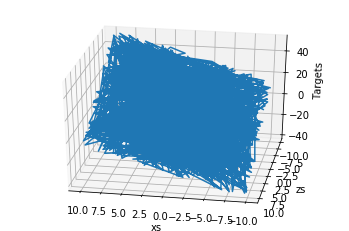

In [4]:
# in order to use the 3D plot, the objects should have a certain shape, so we reshapel the targets.
# The proper method to use is reshape and takes as arguments the dimensions in whcih we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing use to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# can fiddle with the azim parameter to plot the data from different angles. Just change the value
# of azim=100 to azim=0; azim=200, or whatever.
ax.view_init(azim=100)

plt.show()
targets = targets.reshape(observations,1)

Linear relationship in 3D is a **Plane**.

## Initialize variables

In [5]:
# Our initial weights and biases will be picked randomly from the interval[-0.1,0.1]
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1)) # W = 2 x 1

biases = np.random.uniform(-init_range,init_range,size=1) # b = 1 x 1

print(weights)
print(biases)

[[-0.01118035]
 [-0.0306493 ]]
[0.0897084]


## Set a learning rate

In [6]:
learning_rate = 0.02

## Train the model

In [7]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases # (1000 x 2) dot (2 x 1) = 1000 x 1
    deltas = outputs - targets # 1000 x 1
    
    loss = np.sum(deltas**2) / 2 / observations # Loss/observations = Mean loss
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    # Formulas
    weights = weights - learning_rate*np.dot(inputs.T, deltas_scaled) # 2x1 - scalar*(2x1000,1000x1)
        # = 2 x 1
    biases = biases - learning_rate*np.sum(deltas_scaled)

235.29470304195436
220.3575782467679
206.41675403712188
193.40563781619426
181.2620910237196
169.92813104010017
159.34965305381832
149.476170554374
140.26057320267827
131.65890091451462
123.63013307075133
116.13599184081988
109.14075867391936
102.61110307579581
96.5159228480806
90.82619502234046
85.5148367724612
80.55657563700285
75.9278284279606
71.60658824415678
67.57231904647932
63.80585728855564
60.28932013038697
57.006019794127035
53.94038365072728
51.0778796537262
48.4049467621704
45.90893001863989
43.5780199707282
41.40119614520476
39.36817430356586
37.469357225852036
35.69578878656459
34.03911110233203
32.491524545734826
31.04575043346599
29.69499620985109
28.4329229587365
27.25361508793718
26.151552040867923
25.121581899716055
24.158896753595364
23.259009713594306
22.4177334645371
21.631160250652474
20.895643199226875
20.207778892739633
19.564391105968813
18.962515630145855
18.399386111452465
17.87242083601934
17.37921039812619
16.917506192538777
16.48520967587116
16.080362345

## Print weights and biases and see if we have worked correctly

In [8]:
print(weights, biases)

[[ 1.94889567]
 [-2.94067632]] [0.5839351]


2, -3, 5

## Plot last ouputs vs targets

The closer the plot is to a 45 degree line, the closer target and output values are.

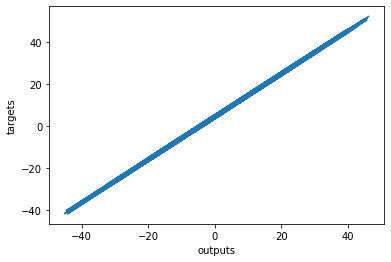

In [9]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()